# Merge results from variant calling and postprocess

In [1]:
import pandas as pd
import gzip
import os
from io import StringIO
import matplotlib.pyplot as plt
from collections import Counter
import tqdm
import seaborn as sns
import numpy as np

### 1. Merge all de vcf files

In [71]:
# List files in directory
files = os.listdir('/mnt/project/analysis/output/')
files = [file for file in files if file.endswith('merged.filt.gz')]

len(files)
files

['results1.merged.filt.gz',
 'results10.merged.filt.gz',
 'results2.merged.filt.gz',
 'results3.merged.filt.gz',
 'results4.merged.filt.gz',
 'results5.merged.filt.gz',
 'results6.merged.filt.gz',
 'results7.merged.filt.gz',
 'results8.merged.filt.gz',
 'results9.merged.filt.gz']

In [1]:
Mutect2_tar_var = pd.read_csv('/mnt/project/analysis/output/results1.merged.filt.gz',sep="\t", compression='gzip')

files = ['results10.merged.filt.gz',
 'results2.merged.filt.gz',
 'results3.merged.filt.gz',
 'results4.merged.filt.gz',
 'results5.merged.filt.gz',
 'results6.merged.filt.gz',
 'results7.merged.filt.gz',
 'results8.merged.filt.gz',
 'results9.merged.filt.gz']

for file in files:
    Mutect2_tar_var_df = pd.read_csv('/mnt/project/analysis/output/'+file ,sep="\t", compression='gzip')
    Mutect2_tar_var = pd.concat([Mutect2_tar_var, Mutect2_tar_var_df], ignore_index=True)

In [73]:
# Include the column case
Mutect2_tar_var['case'] = [x.split('/')[-1].split('_')[0] for x in list(Mutect2_tar_var['name_file'])]
len(set(Mutect2_tar_var['case']))

469503

In [74]:
Mutect2_tar_var.Consequence.value_counts()

intron_variant                               2997464
missense_variant                              345506
synonymous_variant                            224749
5_prime_UTR_variant                           190494
3_prime_UTR_variant                           103556
upstream_gene_variant                          41275
downstream_gene_variant                        30440
splice_region_variant&intron_variant           27148
stop_gained                                    15128
missense_variant&splice_region_variant          2459
splice_donor_variant                            1759
splice_region_variant&synonymous_variant        1725
splice_acceptor_variant                         1458
splice_region_variant&5_prime_UTR_variant        486
stop_gained&splice_region_variant                232
Consequence                                      164
start_lost                                        90
stop_lost                                         35
stop_retained_variant                         

### 2. Remove empty rows

In [75]:
Mutect2_tar_var[Mutect2_tar_var['Consequence']== 'Consequence']

,name_file,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,...,gnomAD_AF,gnomAD_AF_NFE,GT,AD,INFO,FORMAT,VEP_cano,FILTER,VEP,case
21715,name_file,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,...,gnomAD_AF,gnomAD_AF_NFE,GT,AD,INFO,FORMAT,VEP_cano,FILTER,VEP,name
43914,name_file,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,...,gnomAD_AF,gnomAD_AF_NFE,GT,AD,INFO,FORMAT,VEP_cano,FILTER,VEP,name
66107,name_file,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,...,gnomAD_AF,gnomAD_AF_NFE,GT,AD,INFO,FORMAT,VEP_cano,FILTER,VEP,name
88384,name_file,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,...,gnomAD_AF,gnomAD_AF_NFE,GT,AD,INFO,FORMAT,VEP_cano,FILTER,VEP,name
110468,name_file,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,...,gnomAD_AF,gnomAD_AF_NFE,GT,AD,INFO,FORMAT,VEP_cano,FILTER,VEP,name
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3890993,name_file,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,...,gnomAD_AF,gnomAD_AF_NFE,GT,AD,INFO,FORMAT,VEP_cano,FILTER,VEP,name
3912723,name_file,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,...,gnomAD_AF,gnomAD_AF_NFE,GT,AD,INFO,FORMAT,VEP_cano,FILTER,VEP,name
3934696,name_file,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,...,gnomAD_AF,gnomAD_AF_NFE,GT,AD,INFO,FORMAT,VEP_cano,FILTER,VEP,name
3956642,name_file,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,...,gnomAD_AF,gnomAD_AF_NFE,GT,AD,INFO,FORMAT,VEP_cano,FILTER,VEP,name


In [76]:
#Cases without mutations are annotated as headers..!!!!
Mutect2_tar_var = Mutect2_tar_var[Mutect2_tar_var['Consequence']!= 'Consequence']

In [77]:
Mutect2_tar_var.Consequence.value_counts()

intron_variant                               2997464
missense_variant                              345506
synonymous_variant                            224749
5_prime_UTR_variant                           190494
3_prime_UTR_variant                           103556
upstream_gene_variant                          41275
downstream_gene_variant                        30440
splice_region_variant&intron_variant           27148
stop_gained                                    15128
missense_variant&splice_region_variant          2459
splice_donor_variant                            1759
splice_region_variant&synonymous_variant        1725
splice_acceptor_variant                         1458
splice_region_variant&5_prime_UTR_variant        486
stop_gained&splice_region_variant                232
start_lost                                        90
stop_lost                                         35
stop_retained_variant                             13
Name: Consequence, dtype: int64

In [78]:
Mut_case = []
for gene in Mutect2_tar_var['SYMBOL'].unique():
    freq = len(Mutect2_tar_var[Mutect2_tar_var['SYMBOL']==gene]['case'].unique())
#     freq = len(maf_can_PASS_VAF_nonrep.groupby(['SYMBOL'])['case'].unique()[gene])
    Mut_case.append([gene, freq])

In [79]:
Mut_case = pd.DataFrame(Mut_case, columns = ['Gene', 'Cases']).sort_values('Cases', ascending=False)
Mut_case.reset_index()

,index,Gene,Cases
0,1,SF3B1,345638
1,6,DNMT3A,309088
2,0,MDM4,272930
3,7,TP53,251775
4,9,GNAS,245447
5,2,TET2,232046
6,4,ASXL1,228803
7,10,CHEK2,208755
8,5,IDH2,132770
9,3,SRSF2,74959


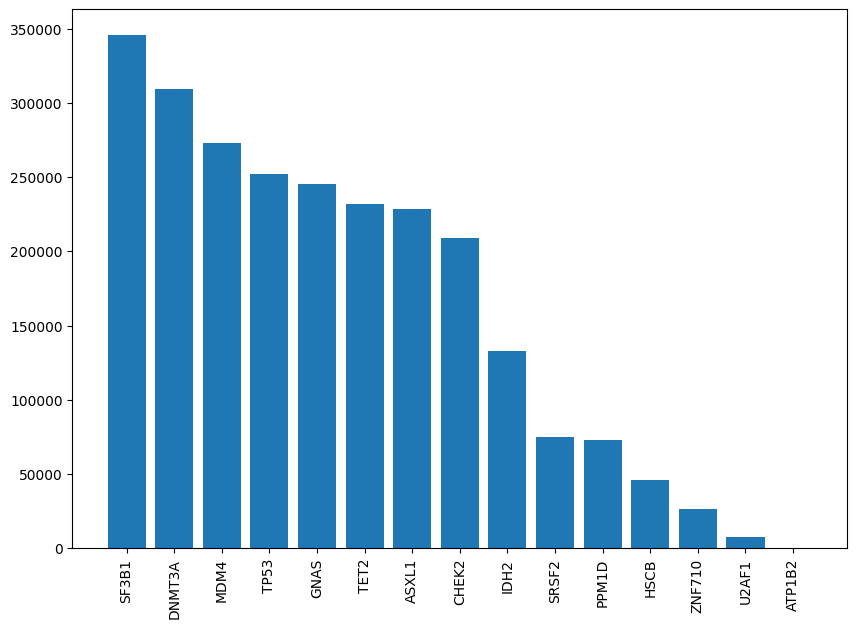

In [80]:
plt.figure(figsize=(10, 7))
Mut_case20 = Mut_case.iloc[:20,]
y_pos = np.arange(len(Mut_case20))
plt.bar(y_pos, Mut_case20['Cases'])
plt.xticks(y_pos, Mut_case20['Gene'], rotation='vertical')
plt.show()

### 3. Fix wrong annotations of other genes than the 12 with boostDM-CH models

In [81]:
# File included in 'UKB_variant_calling/refs'
canonical_transcripts = pd.read_csv('/UKB_variant_calling/refs/hg38_cds.canonical.overlap.gz',sep="\t", compression='gzip')
canonical_transcripts

/tmp/ipykernel_163/368379008.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  canonical_transcripts = pd.read_csv('/mnt/project/analysis/refs/hg38_cds.canonical.overlap.gz',sep="\t", compression='gzip')


,CHROMOSOME,START,END,STRAND,GENE_ID,TRANSCRIPT_ID,SYMBOL
0,1,69091,70005,+,ENSG00000186092,ENST00000335137,OR4F5
1,1,450743,451678,-,ENSG00000284733,ENST00000426406,OR4F29
2,1,685719,686654,-,ENSG00000284662,ENST00000332831,OR4F16
3,1,925942,926013,+,ENSG00000187634,ENST00000342066,SAMD11
4,1,930155,930336,+,ENSG00000187634,ENST00000342066,SAMD11
...,...,...,...,...,...,...,...
193025,Y,25038809,25038914,-,ENSG00000185894,ENST00000382287,BPY2C
193026,Y,25041769,25041886,-,ENSG00000185894,ENST00000382287,BPY2C
193027,Y,25043946,25044023,-,ENSG00000185894,ENST00000382287,BPY2C
193028,Y,25622443,25624034,+,ENSG00000172288,ENST00000306609,CDY1


In [82]:
maf_can_VAF_HSCB = Mutect2_tar_var[Mutect2_tar_var['SYMBOL']=='HSCB']
maf_can_VAF_HSCB

,name_file,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,...,gnomAD_AF,gnomAD_AF_NFE,GT,AD,INFO,FORMAT,VEP_cano,FILTER,VEP,case
185,/home/dnanexus/src/results/1000291_23143_0_0.filt,22,28741956,.,G,C,.,3,7,0.428571,...,NaN,NaN,0/1,"4,3","AS_FilterStatus=SITE;AS_SB_TABLE=4,0|3,0;DP=8;...",GT:AD:AF:DP:F1R2:F2R1:SB,CSQ=C|upstream_gene_variant|MODIFIER|HSCB|ENSG...,germline,CSQ=C|upstream_gene_variant|MODIFIER|HSCB|ENSG...,1000291
219,/home/dnanexus/src/results/1000331_23143_0_0.filt,22,28741956,.,G,C,.,7,7,1.0,...,NaN,NaN,0/1,"0,7","AS_FilterStatus=SITE;AS_SB_TABLE=0,0|7,0;DP=7;...",GT:AD:AF:DP:F1R2:F2R1:SB,CSQ=C|upstream_gene_variant|MODIFIER|HSCB|ENSG...,germline,CSQ=C|upstream_gene_variant|MODIFIER|HSCB|ENSG...,1000331
259,/home/dnanexus/src/results/1000385_23143_0_0.filt,22,28741956,.,G,C,.,5,5,1.0,...,NaN,NaN,0/1,"0,5","AS_FilterStatus=SITE;AS_SB_TABLE=0,0|5,0;DP=6;...",GT:AD:AF:DP:F1R2:F2R1:SB,CSQ=C|upstream_gene_variant|MODIFIER|HSCB|ENSG...,germline,CSQ=C|upstream_gene_variant|MODIFIER|HSCB|ENSG...,1000385
347,/home/dnanexus/src/results/1000549_23143_0_0.filt,22,28741956,.,G,C,.,10,10,1.0,...,NaN,NaN,0/1,"0,10","AS_FilterStatus=SITE;AS_SB_TABLE=0,0|10,0;DP=1...",GT:AD:AF:DP:F1R2:F2R1:SB,CSQ=C|upstream_gene_variant|MODIFIER|HSCB|ENSG...,germline,CSQ=C|upstream_gene_variant|MODIFIER|HSCB|ENSG...,1000549
359,/home/dnanexus/src/results/1000551_23143_0_0.filt,22,28741956,.,G,C,.,5,10,0.5,...,NaN,NaN,0/1,"5,5","AS_FilterStatus=SITE;AS_SB_TABLE=5,0|5,0;DP=11...",GT:AD:AF:DP:F1R2:F2R1:SB,CSQ=C|upstream_gene_variant|MODIFIER|HSCB|ENSG...,germline,CSQ=C|upstream_gene_variant|MODIFIER|HSCB|ENSG...,1000551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3983763,/home/dnanexus/src/results9/5597751_23143_0_0....,22,28741956,.,G,C,.,7,7,1.0,...,NaN,NaN,0/1,"0,7","AS_FilterStatus=SITE;AS_SB_TABLE=0,0|7,0;DP=7;...",GT:AD:AF:DP:F1R2:F2R1:SB,CSQ=C|upstream_gene_variant|MODIFIER|HSCB|ENSG...,germline,CSQ=C|upstream_gene_variant|MODIFIER|HSCB|ENSG...,5597751
3983882,/home/dnanexus/src/results9/5598261_23143_0_0....,22,28741956,.,G,C,.,5,5,1.0,...,NaN,NaN,0/1,"0,5","AS_FilterStatus=SITE;AS_SB_TABLE=0,0|5,0;DP=6;...",GT:AD:AF:DP:F1R2:F2R1:SB,CSQ=C|upstream_gene_variant|MODIFIER|HSCB|ENSG...,germline,CSQ=C|upstream_gene_variant|MODIFIER|HSCB|ENSG...,5598261
3983894,/home/dnanexus/src/results9/5598333_23143_0_0....,22,28741956,.,G,C,.,3,8,0.375,...,NaN,NaN,0/1,"5,3","AS_FilterStatus=SITE;AS_SB_TABLE=5,0|3,0;DP=10...",GT:AD:AF:DP:F1R2:F2R1:SB,CSQ=C|upstream_gene_variant|MODIFIER|HSCB|ENSG...,germline,CSQ=C|upstream_gene_variant|MODIFIER|HSCB|ENSG...,5598333
3984016,/home/dnanexus/src/results9/5598927_23143_0_0....,22,28741956,.,G,C,.,10,10,1.0,...,NaN,NaN,0/1,"0,10","AS_FilterStatus=SITE;AS_SB_TABLE=0,0|10,0;DP=1...",GT:AD:AF:DP:F1R2:F2R1:SB,CSQ=C|upstream_gene_variant|MODIFIER|HSCB|ENSG...,germline,CSQ=C|upstream_gene_variant|MODIFIER|HSCB|ENSG...,5598927


In [83]:
# Those annotated as HSCB are in fact CHEK2
VEP_annotation = maf_can_VAF_HSCB.loc[:,'VEP'][185].split(',')
VEP_annotation

['CSQ=C|upstream_gene_variant|MODIFIER|HSCB|ENSG00000100209|Transcript|ENST00000216027|protein_coding||||||||||rs2236142|83|1||HGNC|HGNC:28913|YES|ENSP00000216027|0.7103|0.5793|0.3879|0.6849|0.3937||||||||||||',
 'C|upstream_gene_variant|MODIFIER|CHEK2|ENSG00000183765|Transcript|ENST00000348295|protein_coding||||||||||rs2236142|122|-1||HGNC|HGNC:16627||ENSP00000329012|0.7103|0.5793|0.3879|0.6849|0.3937||||||||||||',
 'C|upstream_gene_variant|MODIFIER|CHEK2|ENSG00000183765|Transcript|ENST00000382565|protein_coding||||||||||rs2236142|122|-1||HGNC|HGNC:16627||ENSP00000372006|0.7103|0.5793|0.3879|0.6849|0.3937||||||||||||',
 'C|upstream_gene_variant|MODIFIER|CHEK2|ENSG00000183765|Transcript|ENST00000382580|protein_coding||||||||||rs2236142|118|-1||HGNC|HGNC:16627|YES|ENSP00000372023|0.7103|0.5793|0.3879|0.6849|0.3937||||||||||||',
 'C|upstream_gene_variant|MODIFIER|CHEK2|ENSG00000183765|Transcript|ENST00000398017|protein_coding||||||||||rs2236142|154|-1|cds_end_NF|HGNC|HGNC:16627||ENSP0000

In [84]:
for annotation in VEP_annotation:
    if annotation.split('|')[6] in (canonical_transcripts['TRANSCRIPT_ID'].tolist()):
        print(annotation)

CSQ=C|upstream_gene_variant|MODIFIER|HSCB|ENSG00000100209|Transcript|ENST00000216027|protein_coding||||||||||rs2236142|83|1||HGNC|HGNC:28913|YES|ENSP00000216027|0.7103|0.5793|0.3879|0.6849|0.3937||||||||||||
C|upstream_gene_variant|MODIFIER|CHEK2|ENSG00000183765|Transcript|ENST00000382580|protein_coding||||||||||rs2236142|118|-1||HGNC|HGNC:16627|YES|ENSP00000372023|0.7103|0.5793|0.3879|0.6849|0.3937||||||||||||


In [85]:
maf_can_VAF_HSCB.loc[:,'VEP_cano'][185]

'CSQ=C|upstream_gene_variant|MODIFIER|HSCB|ENSG00000100209|Transcript|ENST00000216027|protein_coding||||||||||rs2236142|83|1||HGNC|HGNC:28913|YES|ENSP00000216027|0.7103|0.5793|0.3879|0.6849|0.3937||||||||||||'

In [86]:
# Separate the VEP information and select only the information refered as CHEK2
def get_canonical(vep):
    """
    From the VEP annotation, get the info corresponing to the canonical transcript
    (if there is any VEP annotation)
    """
    VEP_annotations = vep.split(',')
    # Read all VEP annotations (different transcripts)
    for annotation in VEP_annotations:
        # Chech that there is VEP annotation
        if len(annotation) > 1:
            # Select by canonical transcript code
            if annotation.split('|')[6] in ['ENST00000382580']:
                return annotation
# Create new column with canonical transcript VEP info
maf_can_VAF_HSCB['VEP_cano'] = maf_can_VAF_HSCB['VEP'].apply(lambda x: get_canonical(x))

## 3C. Eliminate variants w/o canonical transcript
maf_can_VAF_HSCB = maf_can_VAF_HSCB.dropna(axis=0, subset=['VEP_cano'])

maf_can_VAF_HSCB['Consequence'] = maf_can_VAF_HSCB['VEP_cano'].apply(lambda x: x.split('|')[1])
maf_can_VAF_HSCB['IMPACT'] = maf_can_VAF_HSCB['VEP_cano'].apply(lambda x: x.split('|')[2])
maf_can_VAF_HSCB['SYMBOL'] = maf_can_VAF_HSCB['VEP_cano'].apply(lambda x: x.split('|')[3])
maf_can_VAF_HSCB['ENST'] = maf_can_VAF_HSCB['VEP_cano'].apply(lambda x: x.split('|')[6])
maf_can_VAF_HSCB['CDS_pos'] = maf_can_VAF_HSCB['VEP_cano'].apply(lambda x: x.split('|')[13])
maf_can_VAF_HSCB['Prot_pos'] = maf_can_VAF_HSCB['VEP_cano'].apply(lambda x: x.split('|')[14])
maf_can_VAF_HSCB['AA_change'] = maf_can_VAF_HSCB['VEP_cano'].apply(lambda x: x.split('|')[15])
maf_can_VAF_HSCB['rs_ID'] = maf_can_VAF_HSCB['VEP_cano'].apply(lambda x: x.split('|')[17])
maf_can_VAF_HSCB['ENSP'] = maf_can_VAF_HSCB['VEP_cano'].apply(lambda x: x.split('|')[24])
maf_can_VAF_HSCB['EUR_AF'] = maf_can_VAF_HSCB['VEP_cano'].apply(lambda x: x.split('|')[28])
maf_can_VAF_HSCB['gnomAD_AF'] = maf_can_VAF_HSCB['VEP_cano'].apply(lambda x: x.split('|')[30])
maf_can_VAF_HSCB['gnomAD_AF_NFE'] = maf_can_VAF_HSCB['VEP_cano'].apply(lambda x: x.split('|')[36])

/tmp/ipykernel_163/715400887.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maf_can_VAF_HSCB['VEP_cano'] = maf_can_VAF_HSCB['VEP'].apply(lambda x: get_canonical(x))


In [87]:
# All mutations are off-target, so we decide to exclude them
maf_can_VAF_HSCB['Consequence'].value_counts()

upstream_gene_variant    47284
intron_variant              16
5_prime_UTR_variant          9
Name: Consequence, dtype: int64

In [88]:
Mutect2_tar_var = Mutect2_tar_var[Mutect2_tar_var['SYMBOL']!='HSCB']
print(len(Mutect2_tar_var))

3936708


In [89]:
Mutect2_tar_var[Mutect2_tar_var['SYMBOL']=='ATP1B2']

,name_file,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,...,gnomAD_AF,gnomAD_AF_NFE,GT,AD,INFO,FORMAT,VEP_cano,FILTER,VEP,case
765140,/home/dnanexus/src/results10/5985990_23143_0_0...,17,7662363,.,A,G,.,4,4,1.0,...,NaN,NaN,0/1,"0,4","AS_FilterStatus=SITE;AS_SB_TABLE=0,0|2,2;DP=4;...",GT:AD:AF:DP:F1R2:F2R1:SB,CSQ=G|downstream_gene_variant|MODIFIER|ATP1B2|...,germline,CSQ=G|downstream_gene_variant|MODIFIER|ATP1B2|...,5985990
2825271,/home/dnanexus/src/results7/4055487_23143_0_0....,17,7662616,.,C,T,.,4,4,1.0,...,NaN,NaN,0/1,"0,4","AS_FilterStatus=SITE;AS_SB_TABLE=0,0|2,2;DP=4;...",GT:AD:AF:DP:F1R2:F2R1:SB,CSQ=T|downstream_gene_variant|MODIFIER|ATP1B2|...,PASS,CSQ=T|downstream_gene_variant|MODIFIER|ATP1B2|...,4055487
3019951,/home/dnanexus/src/results7/4308437_23143_0_0....,17,7662426,.,A,C,.,3,3,1.0,...,NaN,NaN,0/1,"0,3","AS_FilterStatus=SITE;AS_SB_TABLE=0,0|2,1;DP=3;...",GT:AD:AF:DP:F1R2:F2R1:SB,CSQ=C|downstream_gene_variant|MODIFIER|ATP1B2|...,PASS,CSQ=C|downstream_gene_variant|MODIFIER|ATP1B2|...,4308437


In [90]:
Mutect2_tar_var = Mutect2_tar_var[Mutect2_tar_var['SYMBOL']!='ATP1B2']

In [91]:
set(Mutect2_tar_var['SYMBOL'])

{'ASXL1',
 'CHEK2',
 'DNMT3A',
 'GNAS',
 'IDH2',
 'MDM4',
 'PPM1D',
 'SF3B1',
 'SRSF2',
 'TET2',
 'TP53',
 'U2AF1',
 'ZNF710'}

In [92]:
maf_can_VAF_ZNF710 = Mutect2_tar_var[Mutect2_tar_var['SYMBOL']=='ZNF710']
len(maf_can_VAF_ZNF710)

30392

In [93]:
VEP_annotation = maf_can_VAF_ZNF710.loc[:,'VEP'][99].split(',')
VEP_annotation
for annotation in VEP_annotation:
    if annotation.split('|')[6] in (canonical_transcripts['TRANSCRIPT_ID'].tolist()):
        print(annotation)

CSQ=A|downstream_gene_variant|MODIFIER|ZNF710|ENSG00000140548|Transcript|ENST00000268154|protein_coding||||||||||rs118053940|2130|1||HGNC|HGNC:25352|YES|ENSP00000268154|0|0.0029|0|0.006|0|0.003625|0.0009235|0.001649|0.0005956|0|0.002277|0.006455|0.003426|0.0009481|benign&likely_benign||1
A|missense_variant|MODERATE|IDH2|ENSG00000182054|Transcript|ENST00000330062|protein_coding|11/11||||1382|1304|435|T/M|aCg/aTg|rs118053940||-1||HGNC|HGNC:5383|YES|ENSP00000331897|0|0.0029|0|0.006|0|0.003625|0.0009235|0.001649|0.0005956|0|0.002277|0.006455|0.003426|0.0009481|benign&likely_benign||1


In [94]:
def get_canonical(vep):
    """
    From the VEP annotation, get the info corresponing to the canonical transcript
    (if there is any VEP annotation)
    """
    VEP_annotations = vep.split(',')
    # Read all VEP annotations (different transcripts)
    for annotation in VEP_annotations:
        # Chech that there is VEP annotation
        if len(annotation) > 1:
            # Select by canonical transcript code
            if annotation.split('|')[6] in ['ENST00000330062']:
                return annotation
# Create new column with canonical transcript VEP info
maf_can_VAF_ZNF710['VEP_cano'] = maf_can_VAF_ZNF710['VEP'].apply(lambda x: get_canonical(x))

## 3C. Eliminate variants w/o canonical transcript
maf_can_VAF_ZNF710 = maf_can_VAF_ZNF710.dropna(axis=0, subset=['VEP_cano'])

maf_can_VAF_ZNF710['Consequence'] = maf_can_VAF_ZNF710['VEP_cano'].apply(lambda x: x.split('|')[1])
maf_can_VAF_ZNF710['IMPACT'] = maf_can_VAF_ZNF710['VEP_cano'].apply(lambda x: x.split('|')[2])
maf_can_VAF_ZNF710['SYMBOL'] = maf_can_VAF_ZNF710['VEP_cano'].apply(lambda x: x.split('|')[3])
maf_can_VAF_ZNF710['ENST'] = maf_can_VAF_ZNF710['VEP_cano'].apply(lambda x: x.split('|')[6])
maf_can_VAF_ZNF710['CDS_pos'] = maf_can_VAF_ZNF710['VEP_cano'].apply(lambda x: x.split('|')[13])
maf_can_VAF_ZNF710['Prot_pos'] = maf_can_VAF_ZNF710['VEP_cano'].apply(lambda x: x.split('|')[14])
maf_can_VAF_ZNF710['AA_change'] = maf_can_VAF_ZNF710['VEP_cano'].apply(lambda x: x.split('|')[15])
maf_can_VAF_ZNF710['rs_ID'] = maf_can_VAF_ZNF710['VEP_cano'].apply(lambda x: x.split('|')[17])
maf_can_VAF_ZNF710['ENSP'] = maf_can_VAF_ZNF710['VEP_cano'].apply(lambda x: x.split('|')[24])
maf_can_VAF_ZNF710['EUR_AF'] = maf_can_VAF_ZNF710['VEP_cano'].apply(lambda x: x.split('|')[28])
maf_can_VAF_ZNF710['gnomAD_AF'] = maf_can_VAF_ZNF710['VEP_cano'].apply(lambda x: x.split('|')[30])
maf_can_VAF_ZNF710['gnomAD_AF_NFE'] = maf_can_VAF_ZNF710['VEP_cano'].apply(lambda x: x.split('|')[36])

/tmp/ipykernel_163/3258550554.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maf_can_VAF_ZNF710['VEP_cano'] = maf_can_VAF_ZNF710['VEP'].apply(lambda x: get_canonical(x))


In [95]:
maf_can_VAF_ZNF710['Consequence'].value_counts()

intron_variant                              10949
missense_variant                             9896
3_prime_UTR_variant                          5098
synonymous_variant                           3903
splice_region_variant&intron_variant          327
stop_gained                                    98
stop_retained_variant                          45
splice_region_variant&synonymous_variant       38
missense_variant&splice_region_variant         22
splice_donor_variant                            8
splice_acceptor_variant                         5
stop_lost                                       3
Name: Consequence, dtype: int64

In [96]:
# Remove those lines containing ZNF710 mutations
Mutect2_tar_var = Mutect2_tar_var[Mutect2_tar_var['SYMBOL']!='ZNF710']
Mutect2_tar_var

,name_file,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,...,gnomAD_AF,gnomAD_AF_NFE,GT,AD,INFO,FORMAT,VEP_cano,FILTER,VEP,case
0,/home/dnanexus/src/results/1000019_23143_0_0.filt,1,204543067,.,A,T,.,5,5,1.0,...,NaN,NaN,0/1,"0,5","AS_FilterStatus=SITE;AS_SB_TABLE=0,0|0,5;DP=6;...",GT:AD:AF:DP:F1R2:F2R1:SB,T|intron_variant|MODIFIER|MDM4|ENSG00000198625...,germline,CSQ=T|intron_variant|MODIFIER|MDM4|ENSG0000019...,1000019
1,/home/dnanexus/src/results/1000019_23143_0_0.filt,2,197418640,.,C,G,.,10,25,0.4,...,0.004365,0.0075,0/1,"15,10","AS_FilterStatus=SITE;AS_SB_TABLE=7,8|6,4;DP=28...",GT:AD:AF:DP:F1R2:F2R1:SB,CSQ=G|intron_variant|MODIFIER|SF3B1|ENSG000001...,germline,CSQ=G|intron_variant|MODIFIER|SF3B1|ENSG000001...,1000019
2,/home/dnanexus/src/results/1000019_23143_0_0.filt,4,105237193,.,A,C,.,33,59,0.559322,...,0.002863,0.003613,0/1,"26,33","AS_FilterStatus=SITE;AS_SB_TABLE=10,16|19,14;D...",GT:AD:AF:DP:F1R2:F2R1:SB,C|missense_variant|MODERATE|TET2|ENSG000001687...,germline,CSQ=C|missense_variant&NMD_transcript_variant|...,1000019
3,/home/dnanexus/src/results/1000019_23143_0_0.filt,17,76736803,.,G,T,.,3,69,0.043478,...,NaN,NaN,0/1,"66,3","AS_FilterStatus=weak_evidence;AS_SB_TABLE=39,2...",GT:AD:AF:DP:F1R2:F2R1:SB,T|missense_variant|MODERATE|SRSF2|ENSG00000161...,weak_evidence,CSQ=T|upstream_gene_variant|MODIFIER|MFSD11|EN...,1000019
4,/home/dnanexus/src/results/1000019_23143_0_0.filt,20,32358721,.,A,C,.,3,6,0.5,...,NaN,NaN,0/1,"3,3","AS_FilterStatus=weak_evidence,base_qual;AS_SB_...",GT:AD:AF:DP:F1R2:F2R1:SB,C|5_prime_UTR_variant|MODIFIER|ASXL1|ENSG00000...,base_qual;clustered_events;germline;weak_evidence,CSQ=C|upstream_gene_variant|MODIFIER|ASXL1|ENS...,1000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984176,/home/dnanexus/src/results9/5599961_23143_0_0....,4,105275677,.,C,T,.,37,83,0.445783,...,0.007272,0.01297,0/1,"46,37","AS_FilterStatus=SITE;AS_SB_TABLE=17,29|18,19;D...",GT:AD:AF:DP:F1R2:F2R1:SB,T|missense_variant|MODERATE|TET2|ENSG000001687...,germline,CSQ=T|3_prime_UTR_variant&NMD_transcript_varia...,5599961
3984177,/home/dnanexus/src/results9/5599961_23143_0_0....,20,32358722,.,G,C,.,3,17,0.176471,...,NaN,NaN,0|1,"14,3","AS_FilterStatus=weak_evidence,base_qual;AS_SB_...",GT:AD:AF:DP:F1R2:F2R1:PGT:PID:PS:SB,C|5_prime_UTR_variant|MODIFIER|ASXL1|ENSG00000...,base_qual;clustered_events;germline;haplotype;...,CSQ=C|upstream_gene_variant|MODIFIER|ASXL1|ENS...,5599961
3984178,/home/dnanexus/src/results9/5599961_23143_0_0....,20,32358726,.,G,C,.,4,17,0.235294,...,NaN,NaN,0|1,"13,4","AS_FilterStatus=weak_evidence,base_qual;AS_SB_...",GT:AD:AF:DP:F1R2:F2R1:PGT:PID:PS:SB,C|5_prime_UTR_variant|MODIFIER|ASXL1|ENSG00000...,base_qual;clustered_events;germline;haplotype;...,CSQ=C|upstream_gene_variant|MODIFIER|ASXL1|ENS...,5599961
3984179,/home/dnanexus/src/results9/5599961_23143_0_0....,22,28689072,.,C,T,.,4,14,0.285714,...,NaN,NaN,0/1,"10,4","AS_FilterStatus=weak_evidence,map_qual;AS_SB_T...",GT:AD:AF:DP:F1R2:F2R1:SB,T|intron_variant|MODIFIER|CHEK2|ENSG0000018376...,germline;map_qual;weak_evidence,CSQ=T|intron_variant|MODIFIER|CHEK2|ENSG000001...,5599961


In [97]:
# Merge it with the corrected ones
Mutect2_tar_var = pd.concat([Mutect2_tar_var,maf_can_VAF_ZNF710], ignore_index=True)
len(Mutect2_tar_var)

3936705

In [98]:
# Remove off target SNV
off_target = ['intron_variant', 'synonymous_variant', '5_prime_UTR_variant', '3_prime_UTR_variant', 'upstream_gene_variant', 'downstream_gene_variant']
Mutect2_tar_var = Mutect2_tar_var[~Mutect2_tar_var['Consequence'].isin(off_target)]
len(Mutect2_tar_var)

402367

### 4. Filter SNPS

In [112]:
Mutect2_tar_var['gnomAD_AF']

2          0.002863
3               NaN
16              NaN
21         0.712500
29         0.000044
             ...   
3936691    0.003625
3936693    0.000000
3936694    0.003625
3936700    0.003625
3936702    0.003625
Name: gnomAD_AF, Length: 402367, dtype: float64

In [114]:
print(len(Mutect2_tar_var))
Mutect2_tar_var['gnomAD_AF'] = Mutect2_tar_var['gnomAD_AF'].replace('', 0).astype(float)
Mutect2_tar_var['gnomAD_AF_NFE'] = Mutect2_tar_var['gnomAD_AF_NFE'].replace('', 0).astype(float)
Mutect2_tar_var['EUR_AF'] = Mutect2_tar_var['EUR_AF'].replace('', 0).astype(float)
Mutect2_tar_var['gnomAD_AF'] = Mutect2_tar_var['gnomAD_AF'].replace(np.nan, 0).astype(float)
Mutect2_tar_var['gnomAD_AF_NFE'] = Mutect2_tar_var['gnomAD_AF_NFE'].replace(np.nan, 0).astype(float)
Mutect2_tar_var['EUR_AF'] = Mutect2_tar_var['EUR_AF'].replace(np.nan, 0).astype(float)

maf_can_VAF_SNP = Mutect2_tar_var[(Mutect2_tar_var['gnomAD_AF']>=0.001) |\
                                     (Mutect2_tar_var['gnomAD_AF_NFE']>=0.001) |\
                                     (Mutect2_tar_var['EUR_AF']>=0.001)]
print(len(maf_can_VAF_SNP))
# maf_VAF.drop(maf_can_VAF_SNP.index.values.tolist(), axis=0)
maf_can_VAF_SNV = Mutect2_tar_var[(Mutect2_tar_var['gnomAD_AF']<=0.001) &\
                                     (Mutect2_tar_var['gnomAD_AF_NFE']<=0.001) &\
                                     (Mutect2_tar_var['EUR_AF']<=0.001)]
print(len(maf_can_VAF_SNV))

maf_can_VAF_SNV

402367
196427
211094


,name_file,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,...,gnomAD_AF,gnomAD_AF_NFE,GT,AD,INFO,FORMAT,VEP_cano,FILTER,VEP,case
3,/home/dnanexus/src/results/1000019_23143_0_0.filt,17,76736803,.,G,T,.,3,69,0.043478,...,0.000000,0.000000,0/1,"66,3","AS_FilterStatus=weak_evidence;AS_SB_TABLE=39,2...",GT:AD:AF:DP:F1R2:F2R1:SB,T|missense_variant|MODERATE|SRSF2|ENSG00000161...,weak_evidence,CSQ=T|upstream_gene_variant|MODIFIER|MFSD11|EN...,1000019
16,/home/dnanexus/src/results/1000046_23143_0_0.filt,4,105235310,.,G,T,.,27,53,0.509434,...,0.000000,0.000000,0/1,"26,27","AS_FilterStatus=SITE;AS_SB_TABLE=10,16|9,18;DP...",GT:AD:AF:DP:F1R2:F2R1:SB,T|missense_variant|MODERATE|TET2|ENSG000001687...,PASS,CSQ=T|missense_variant&NMD_transcript_variant|...,1000046
29,/home/dnanexus/src/results/1000063_23143_0_0.filt,4,105275224,.,C,T,.,3,74,0.040541,...,0.000044,0.000049,0/1,"71,3","AS_FilterStatus=weak_evidence;AS_SB_TABLE=32,3...",GT:AD:AF:DP:F1R2:F2R1:SB,T|missense_variant|MODERATE|TET2|ENSG000001687...,orientation;weak_evidence,CSQ=T|3_prime_UTR_variant&NMD_transcript_varia...,1000063
41,/home/dnanexus/src/results/1000081_23143_0_0.filt,2,25244255,.,T,C,.,3,62,0.048387,...,0.000000,0.000000,0/1,"59,3","AS_FilterStatus=SITE;AS_SB_TABLE=27,32|2,1;DP=...",GT:AD:AF:DP:F1R2:F2R1:SB,CSQ=C|missense_variant|MODERATE|DNMT3A|ENSG000...,PASS,CSQ=C|missense_variant|MODERATE|DNMT3A|ENSG000...,1000081
55,/home/dnanexus/src/results/1000129_23143_0_0.filt,20,32435305,.,G,A,.,48,98,0.489796,...,0.000179,0.000343,0/1,"50,48","AS_FilterStatus=SITE;AS_SB_TABLE=26,24|26,22;D...",GT:AD:AF:DP:F1R2:F2R1:SB,A|missense_variant|MODERATE|ASXL1|ENSG00000171...,germline,CSQ=A|missense_variant|MODERATE|ASXL1|ENSG0000...,1000129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936657,/home/dnanexus/src/results9/5568363_23143_0_0....,15,90084993,.,A,G,.,11,24,0.458333,...,0.000008,0.000018,0/1,"13,11","AS_FilterStatus=SITE;AS_SB_TABLE=10,3|7,4;DP=2...",GT:AD:AF:DP:F1R2:F2R1:SB,G|splice_region_variant&intron_variant|LOW|IDH...,PASS,CSQ=G|downstream_gene_variant|MODIFIER|ZNF710|...,5568363
3936662,/home/dnanexus/src/results9/5572129_23143_0_0....,15,90087112,.,C,G,.,3,53,0.056604,...,0.000000,0.000000,0|1,"50,3","AS_FilterStatus=SITE;AS_SB_TABLE=32,18|1,2;DP=...",GT:AD:AF:DP:F1R2:F2R1:PGT:PID:PS:SB,G|missense_variant&splice_region_variant|MODER...,PASS,CSQ=G|downstream_gene_variant|MODIFIER|ZNF710|...,5572129
3936664,/home/dnanexus/src/results9/5574162_23143_0_0....,15,90085395,.,G,T,.,3,41,0.073171,...,0.000000,0.000000,0/1,"38,3","AS_FilterStatus=weak_evidence;AS_SB_TABLE=9,29...",GT:AD:AF:DP:F1R2:F2R1:SB,T|splice_region_variant&intron_variant|LOW|IDH...,weak_evidence,CSQ=T|downstream_gene_variant|MODIFIER|ZNF710|...,5574162
3936686,/home/dnanexus/src/results9/5584423_23143_0_0....,15,90084840,.,G,A,.,14,31,0.451613,...,0.000016,0.000026,0/1,"17,14","AS_FilterStatus=SITE;AS_SB_TABLE=11,6|9,5;DP=3...",GT:AD:AF:DP:F1R2:F2R1:SB,A|missense_variant|MODERATE|IDH2|ENSG000001820...,PASS,CSQ=A|downstream_gene_variant|MODIFIER|ZNF710|...,5584423


In [115]:
maf_can_VAF_SNV = maf_can_VAF_SNV.astype({'POS': str, '#CHROM': str, 'REF': str, 'ALT': str, 'case': str}) 
maf_can_VAF_SNV['rep'] = maf_can_VAF_SNV['#CHROM']+':'+maf_can_VAF_SNV['POS']+','+maf_can_VAF_SNV['REF']+'/'+maf_can_VAF_SNV['ALT']
maf_can_VAF_SNV['rep2'] = maf_can_VAF_SNV['#CHROM']+':'+maf_can_VAF_SNV['POS']+','+maf_can_VAF_SNV['REF']+'/'+maf_can_VAF_SNV['ALT']+'-'+maf_can_VAF_SNV['case']  

### 5. Coorect AA

In [116]:
maf_can_VAF_SNV['Prot_pos'].value_counts()

882       1712
388        930
882.0      810
153        736
387        669
          ... 
1752.0       1
1820.0       1
1719.0       1
1728.0       1
1657.0       1
Name: Prot_pos, Length: 3895, dtype: int64

In [117]:
maf_can_VAF_SNV['Prot_pos'] = maf_can_VAF_SNV['Prot_pos'].replace('', np.nan)

In [118]:
import math
protpos = []
for x in maf_can_VAF_SNV['Prot_pos']:
    if isinstance(x, str):
        protpos.append(int(x))
    else:
        if math.isnan(x):
            protpos.append(x)
        else:
            protpos.append(int(x))
maf_can_VAF_SNV['AA'] = protpos

In [119]:
maf_can_VAF_SNV[maf_can_VAF_SNV['SYMBOL']=='DNMT3A']['AA'].value_counts()

882.0    2435
736.0     721
735.0     657
326.0     580
391.0     573
         ... 
273.0       1
74.0        1
148.0       1
133.0       1
629.0       1
Name: AA, Length: 902, dtype: int64

In [121]:
maf_can_VAF_SNV['Occur'] = [maf_can_VAF_SNV['rep'].tolist().count(x) for x in maf_can_VAF_SNV['rep']]
#Check the hotspot, how many occurrences of DNMT3A-882
maf_can_VAF_SNV[(maf_can_VAF_SNV['SYMBOL']=='DNMT3A') & (maf_can_VAF_SNV['AA']==882)]['Occur'].value_counts()

In [ ]:
maf_can_VAF_SNV[maf_can_VAF_SNV['Occur']==1391]

### 6. Remove poN

In [5]:
poN = pd.read_csv('polN/polN_v2.vcf', compression='gzip',sep="\t")
len(poN)

584

In [137]:
maf_can_VAF_SNV['poN'] = maf_can_VAF_SNV['#CHROM']+':'+maf_can_VAF_SNV['POS']+','+maf_can_VAF_SNV['REF']

In [139]:
len(maf_can_VAF_SNV[maf_can_VAF_SNV['poN'].isin(poN.rep.to_list())])

45

In [2]:
maf_can_VAF_SNV = maf_can_VAF_SNV[~maf_can_VAF_SNV['poN'].isin(poN.rep.to_list())]

### 7. BoostDM prediction

In [6]:
Rules_matrix = pd.read_csv('../../../Paper_data/Expert_curated_rules/genes12_BoostdmCH_Harvard_simp_run20230803.tsv.gz', compression='gzip',sep="\t")
BoostDM_dirvers = Rules_matrix[Rules_matrix['boostDM_class']==1]
BoostDM_dirvers

,gene,chr,pos,alt,Prot_pos,aachange,csqn_type_missense,csqn_type_nonsense,csqn_type_splicing,csqn_type_synonymous,boostDM_score,boostDM_class,Niroula,Bick,CNIC,WHO
2,ASXL1,20,32358779,T,2,K2*,0,1,0,0,0.989503,1,0.0,0.0,0.0,0.0
20,ASXL1,20,32358785,T,4,K4*,0,1,0,0,0.989768,1,0.0,0.0,0.0,0.0
29,ASXL1,20,32358788,T,5,Q5*,0,1,0,0,0.975674,1,0.0,0.0,0.0,0.0
38,ASXL1,20,32358791,T,6,K6*,0,1,0,0,0.991413,1,0.0,0.0,0.0,0.0
47,ASXL1,20,32358794,T,7,K7*,0,1,0,0,0.988842,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87811,U2AF1,21,43104401,G,16,V16L,1,0,0,0,0.897579,1,0.0,0.0,0.0,0.0
87812,U2AF1,21,43104401,T,16,V16I,1,0,0,0,0.897579,1,0.0,0.0,0.0,0.0
87816,U2AF1,21,43107451,A,15,K15I,1,0,0,0,0.508676,1,0.0,0.0,0.0,0.0
87817,U2AF1,21,43107451,C,15,K15R,1,0,0,0,0.508676,1,0.0,0.0,0.0,0.0


In [8]:
#Select mutations based on driver call

maf_can_VAF_SNV['ID2'] = maf_can_VAF_SNV['#CHROM'].astype(str)+"-"+\
                            maf_can_VAF_SNV['POS'].astype(str) +"-"+\
                            maf_can_VAF_SNV['ALT'].astype(str)

maf_can_VAF_SNP['ID2'] = maf_can_VAF_SNP['#CHROM'].astype(str)+"-"+\
                            maf_can_VAF_SNP['POS'].astype(str) +"-"+\
                            maf_can_VAF_SNP['ALT'].astype(str)

BoostDM_dirvers['ID2'] = Santi_matrix['chr'].astype(str) +"-"+\
                            Santi_matrix['pos'].astype(str) +"-"+\
                            Santi_matrix['alt'].astype(str)

In [143]:
maf_can_VAF_SNV['BoostDM'] = np.where(maf_can_VAF_SNV['ID2'].isin(BoostDM_dirvers['ID2'].to_list()), 1, 0)
maf_can_VAF_SNV['BoostDM'].value_counts()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    169609
1     41440
Name: BoostDM, dtype: int64

In [144]:
maf_can_VAF_SNP['BoostDM'] = np.where(maf_can_VAF_SNP['ID2'].isin(BoostDM_dirvers['ID2'].to_list()), 1, 0)
maf_can_VAF_SNP['BoostDM'].value_counts()

0    195092
1      1335
Name: BoostDM, dtype: int64

In [145]:
Mut_case = []
for gene in maf_can_VAF_SNV['SYMBOL'].unique():
    freq = len(maf_can_VAF_SNV[maf_can_VAF_SNV['SYMBOL']==gene]['case'].unique())
    freq_driv = len(maf_can_VAF_SNV[(maf_can_VAF_SNV['SYMBOL']==gene) & (maf_can_VAF_SNV['BoostDM']==1)]['case'].unique())
    freq_pass = len(maf_can_VAF_SNV[(maf_can_VAF_SNV['SYMBOL']==gene) & (maf_can_VAF_SNV['BoostDM']==0)]['case'].unique())
#     freq = len(maf_can_PASS_VAF_nonrep.groupby(['SYMBOL'])['case'].unique()[gene])
    Mut_case.append([gene, freq, freq_driv, freq_pass])

In [146]:
Mut_case = pd.DataFrame(Mut_case, columns = ['Gene', 'Cases', 'Drivers', 'Passangers']).sort_values('Cases', ascending=False)
Mut_case.reset_index()

,index,Gene,Cases,Drivers,Passangers
0,2,DNMT3A,39326,20389,20260
1,1,TET2,37632,9607,29139
2,3,ASXL1,32902,2463,30773
3,10,GNAS,20002,584,19466
4,6,PPM1D,13578,905,12726
5,7,CHEK2,11007,2205,9173
6,4,SF3B1,10059,756,9330
7,5,TP53,8938,2294,6724
8,9,IDH2,8601,135,8470
9,8,MDM4,7197,280,6927


In [148]:
len(maf_can_VAF_SNV[maf_can_VAF_SNV['BoostDM']==1])

41440

In [149]:
# Save the mutaitons
maf_can_VAF_SNV.to_csv("All450k_filtered_boostDM.vcf", sep="\t", index=False, compression='gzip')